In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1>Load the dataset</h1>

In [2]:
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<h2>exploring dataset</h2>

In [3]:
df.shape

(8807, 12)

In [4]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<h1>handling missing values</h1>

In [5]:
df['director'] =df['director'].fillna("Unknown")
df['cast']=df['cast'].fillna("Not Listed")
df['country']=df['country'].fillna("Unknown")
df['rating']=df['rating'].fillna("Not Rated")

df.dropna(subset=['date_added', 'duration'], inplace=True)


In [6]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
# First, remove extra spaces from date strings
df['date_added'] = df['date_added'].str.strip()

# Now convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [11]:
df.dropna(subset=['date_added'],inplace=True)

<h1>How many Movies and TV Shows are there?</h1>

In [13]:
df['type'].value_counts()

type
Movie      6128
TV Show    2666
Name: count, dtype: int64

<h1>Top 10 Countries with Most Content</h1>

In [14]:
s=df[df['country']!='Unknown']['country'].value_counts().head(10)
s

country
United States     2809
India              972
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

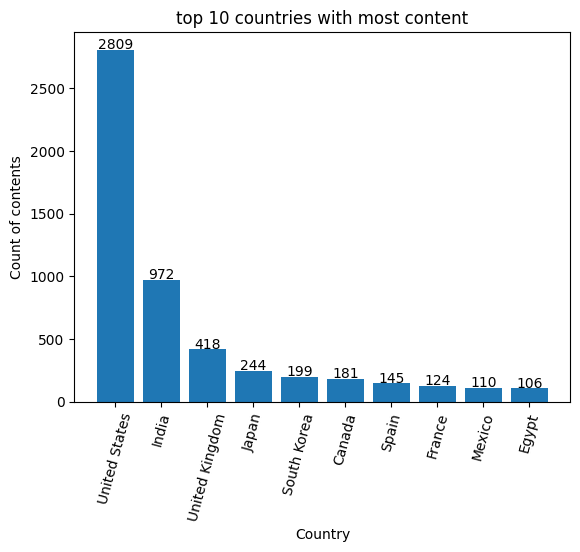

In [15]:
country=[]
count=[]
for i,j in s.items():
    country.append(i)
    count.append(j)
plt.bar(country,count)
plt.xticks(rotation=75)
plt.title("top 10 countries with most content")
plt.xlabel("Country")
plt.ylabel("Count of contents")
for i in range(len(country)):
    plt.text(i,count[i]+8,str(count[i]),ha="center")
plt.show()

<h1>How many titles were added each year?</h1>

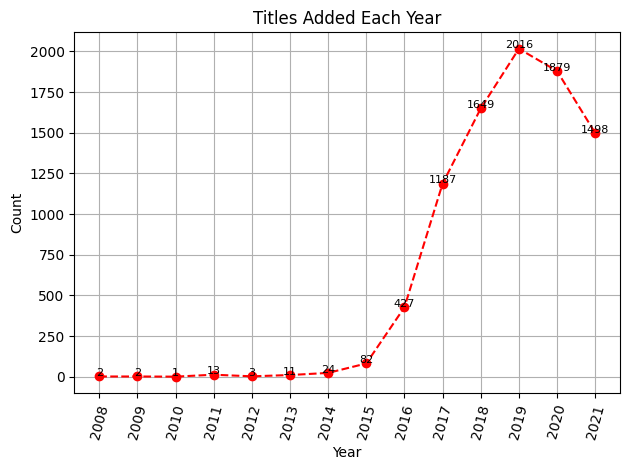

In [16]:
s = df['year_added'].value_counts().sort_index()

years = []
count = []

for year, c in s.items():
    years.append(year)
    count.append(c)

plt.plot(years, count, "ro--")
plt.xticks(years, rotation=75)
plt.title("Titles Added Each Year")
plt.xlabel("Year")
plt.ylabel("Count")

# Optional: annotate
for i in range(len(years)):
    plt.text(years[i], count[i] + 2, str(count[i]), ha="center", fontsize=8)

plt.grid(True)
plt.tight_layout()
plt.show()


<h1>What are the most common content ratings?</h1>

In [17]:
df['rating'].value_counts().head(10)

rating
TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
TV-Y7     333
TV-Y      306
PG        287
TV-G      220
NR         79
Name: count, dtype: int64

In [18]:
df['type'].value_counts()

type
Movie      6128
TV Show    2666
Name: count, dtype: int64

<h1>What are the most common genres on Netflix?</h1>

In [20]:
s=df['listed_in'].str.split(', ').explode()
s.value_counts().head(10)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

In [28]:
s=df['listed_in'].str.split(', ').explode().value_counts().head(10)
s

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

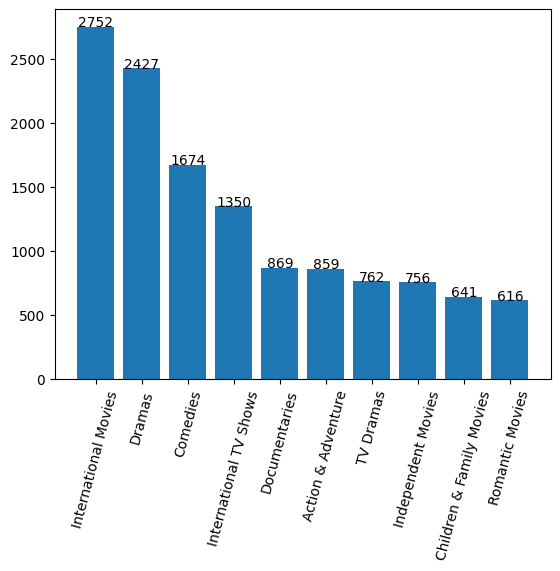

In [33]:
genres=[]
counts=[]
for i,j in s.items():
    genres.append(i)
    counts.append(j)
plt.bar(genres,counts)
plt.xticks(genres,rotation=75)
for i in range(len(genres)):
    plt.text(i,counts[i]+2,str(counts[i]),ha="center")
plt.show()

<h1>What is the distribution of movie durations?</h1>

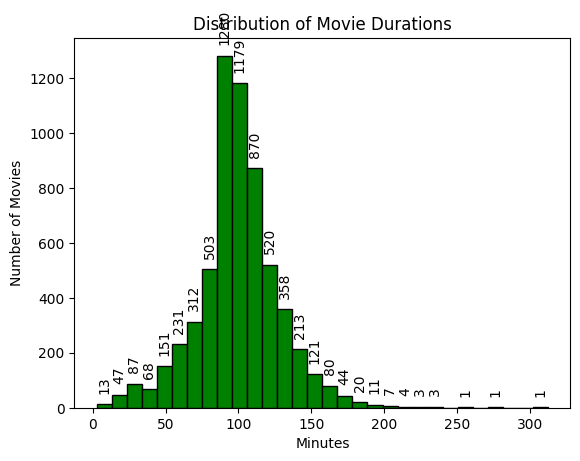

In [74]:
# Correct version (use raw string with r'')
movie_durations = df[df['type'] == 'Movie']['duration'].str.extract(r'(\d+)')[0].astype(int)
counts, bin_edges, patches = plt.hist(movie_durations, bins=30, color='green', edgecolor='black')
plt.title("Distribution of Movie Durations")
plt.xlabel("Minutes")
plt.ylabel("Number of Movies")
for count, edge in zip(counts, bin_edges):
    if count > 0:
        plt.text(x=edge + 5, y=count + 50, s=str(int(count)), ha='center',rotation=90)
# plt.grid(True)
plt.show()


<h1>How many TV Shows by number of seasons?</h1>

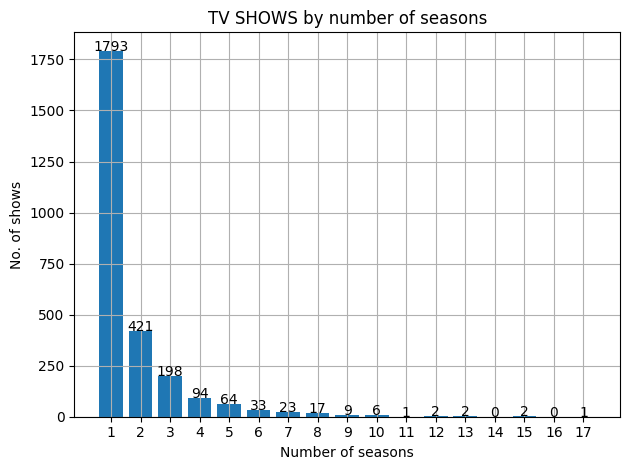

In [112]:
s=df[df['type']!='Movie']['duration'].str.extract(r'(\d+)')[0].astype(int)
s=s.value_counts().sort_index()
# print(s)
seasons=[]
shows=[]
for i,j in s.items():
    seasons.append(i)
    shows.append(j)
plt.bar(seasons,shows)
xtick=range(1,18)
plt.xticks(xtick)
plt.xlabel("Number of seasons")
plt.ylabel("No. of shows")
plt.title("TV SHOWS by number of seasons")
plt.grid(True)
plt.tight_layout()
for i in xtick:
    plt.text(i,s.get(i,0),str(s.get(i,0)),ha="center")
plt.show()

<h1>Which directors have the most content on Netflix?</h1>

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Steven Spielberg          11
Name: count, dtype: int64


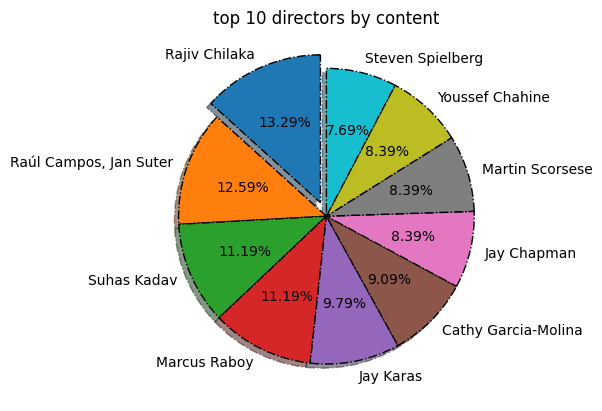

In [136]:
s=df[df['director']!='Unknown']['director'].value_counts()
s=s.head(10)
print(s)
directors=[]
content=[]
for i,j in s.items():
    directors.append(i)
    content.append(j)
# plt.pie(content,labels=directors,autopct='%.2f%%',startangle=90,shadow=True,wedgeprops={'edgecolor': 'black','linestyle': '-.'})
explode = [0.1] + [0]*9  # Emphasize the top director only
plt.pie(content, labels=directors, autopct='%.2f%%', startangle=90, 
        shadow=True, wedgeprops={'edgecolor': 'black','linestyle': '-.'}, explode=explode)
plt.title("top 10 directors by content")
plt.show()

<h1>Heatmap of content by year & type</h1>

In [138]:
import seaborn as sns

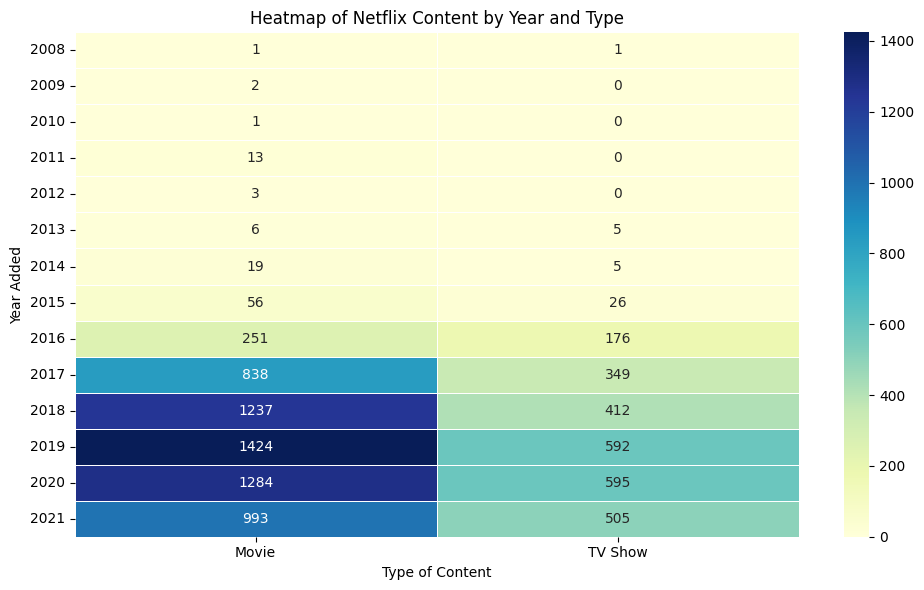

In [141]:
# Only keep rows where year_added and type are not missing
df_heat = df[['year_added', 'type']].dropna()

pivot = df_heat.pivot_table(index='year_added', columns='type', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title("Heatmap of Netflix Content by Year and Type")
plt.xlabel("Type of Content")
plt.ylabel("Year Added")
plt.tight_layout()
plt.show()

<h1>recommendatio similar movies and TV Shows</h1>

In [148]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you already have your dataframe 'df' loaded with Netflix data
# Prepare the dataframe: keep necessary columns and drop rows with missing values
df_rec = df[['title', 'description', 'listed_in']].dropna()
df_rec['combined'] = df_rec['description'] + ' ' + df_rec['listed_in']

# Step 1 & 2: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_rec['combined'])

# Step 3: Cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a Series to map titles to index
indices = pd.Series(df_rec.index, index=df_rec['title']).drop_duplicates()

def recommend(title, n=5):
    if title not in indices:
        return f"Sorry, '{title}' not found in dataset."
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:n+1]
    movie_indices = [i[0] for i in sim_scores]
    return df_rec['title'].iloc[movie_indices].tolist()

if __name__ == "__main__":
    while True:
        user_input = input("Enter a Netflix show/movie title (or 'exit' to quit): ")
        if user_input.lower() == 'exit':
            print("Goodbye!")
            break
        recommendations = recommend(user_input)
        if isinstance(recommendations, str):
            print(recommendations)
        else:
            print(f"Top recommendations similar to '{user_input}':")
            for i, rec in enumerate(recommendations, 1):
                print(f"{i}. {rec}")
        print("\n")


Enter a Netflix show/movie title (or 'exit' to quit):  Kota Factory


Top recommendations similar to 'Kota Factory':
1. Cheese in the Trap
2. Single Ladies Senior
3. Racket Boys
4. Teresa
5. The Politician




Enter a Netflix show/movie title (or 'exit' to quit):  exit


Goodbye!
